<a href="https://colab.research.google.com/github/Reyanfazz/Face_recognition_PCA_with__ANN_algorithm/blob/main/Face_recognition_PCA_with__ANN_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os, cv2

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
  """Helper function to plot a gallery of portraits"""
  plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
  for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i].reshape((h,w)),cmap=plt.cm.gray)
    plt.title(titles[i], size=12)
    plt.xticks(())
    plt.yticks(())

In [ ]:
dir_name = "/content/drive/MyDrive/face_rec/faces/"
y = []
x = []  # Ensure consistent naming
target_names = []
person_id = 0
h = w = 300
n_samples = 0
class_names = []

for person_name in os.listdir(dir_name):
    # Process each person directory
    dir_path = dir_name + person_name + "/"
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        # Formulate the image path
        image_path = dir_path + image_name
        # Read the input image
        img = cv2.imread(image_path)
        # Convert into grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Resize image to 300x300 dimension
        resized_image = cv2.resize(gray, (h, w))
        # Convert matrix to vector
        v = resized_image.flatten()
        x.append(v)  # Append to `x`
        # Increase the number of samples
        n_samples += 1
        # Add the categorical label
        y.append(person_id)
        # Adding the person name
        target_names.append(person_name)
    # Increase the person ID by 1
    person_id += 1

# Transform list to numpy arrays
y = np.array(y)
x = np.array(x)
target_names = np.array(target_names)
n_features = x.shape[1]

# Output dataset information
print(y.shape, x.shape, target_names.shape)
print("Number of samples:", n_samples)
n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


(450,) (450, 90000) (450,)
Number of samples: 450
Total dataset size:
n_samples: 450
n_features: 90000
n_classes: 450


Extracting the top 150 eigenfaces from 337 faces


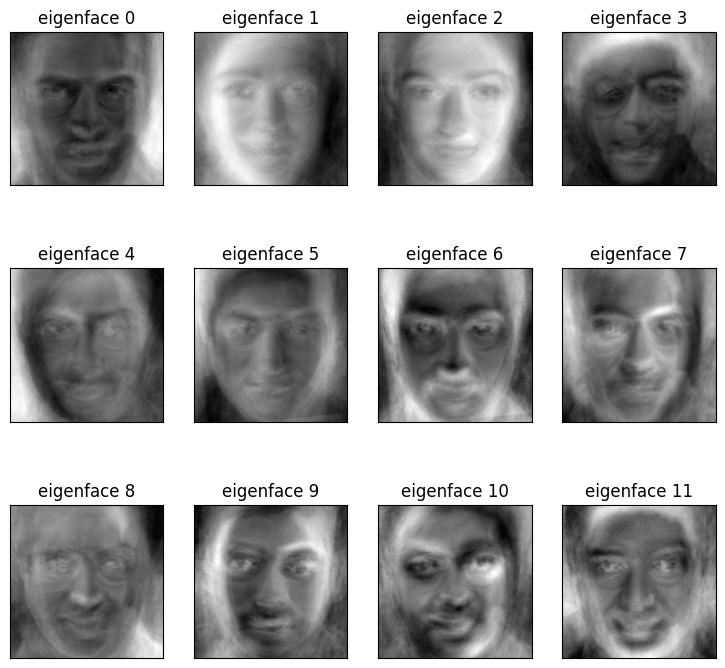

Projecting the input data on the eigenfaces orthonormal basis
(337, 150) (113, 150)
Projection done.


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42
)

# Compute PCA (eigenfaces) on the face dataset: dimensionality reduction
n_components = 150
print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))

# Applying PCA
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

# Generating eigenfaces
eigenfaces = pca.components_.reshape((n_components, h, w))

# Plot the gallery of the most significant eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

# Project the input data onto the eigenfaces orthonormal basis
print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)

# Apply Linear Discriminant Analysis (LDA) to the PCA-reduced data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)

X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)

print("Projection done.")


In [ ]:
# Training with Multi layer perceptron
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10,10),max_iter=1000, verbose=True).fit(X_train_lda, y_train)
print("Model Weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 2.99546949
Iteration 2, loss = 2.94585844
Iteration 3, loss = 2.89656629
Iteration 4, loss = 2.84907281
Iteration 5, loss = 2.80300384
Iteration 6, loss = 2.75767887
Iteration 7, loss = 2.71642277
Iteration 8, loss = 2.67260930
Iteration 9, loss = 2.63298904
Iteration 10, loss = 2.59458487
Iteration 11, loss = 2.55620074
Iteration 12, loss = 2.51875686
Iteration 13, loss = 2.48361987
Iteration 14, loss = 2.44936140
Iteration 15, loss = 2.41466265
Iteration 16, loss = 2.38324788
Iteration 17, loss = 2.35111234
Iteration 18, loss = 2.32052951
Iteration 19, loss = 2.29247244
Iteration 20, loss = 2.26380522
Iteration 21, loss = 2.23695319
Iteration 22, loss = 2.21063187
Iteration 23, loss = 2.18445689
Iteration 24, loss = 2.15905315
Iteration 25, loss = 2.13487660
Iteration 26, loss = 2.11144035
Iteration 27, loss = 2.08879015
Iteration 28, loss = 2.06698036
Iteration 29, loss = 2.04548574
Iteration 30, loss = 2.02428630
Iteration 31, loss = 2.00357776
Iteration 32, los

Accuracy: 71.68%


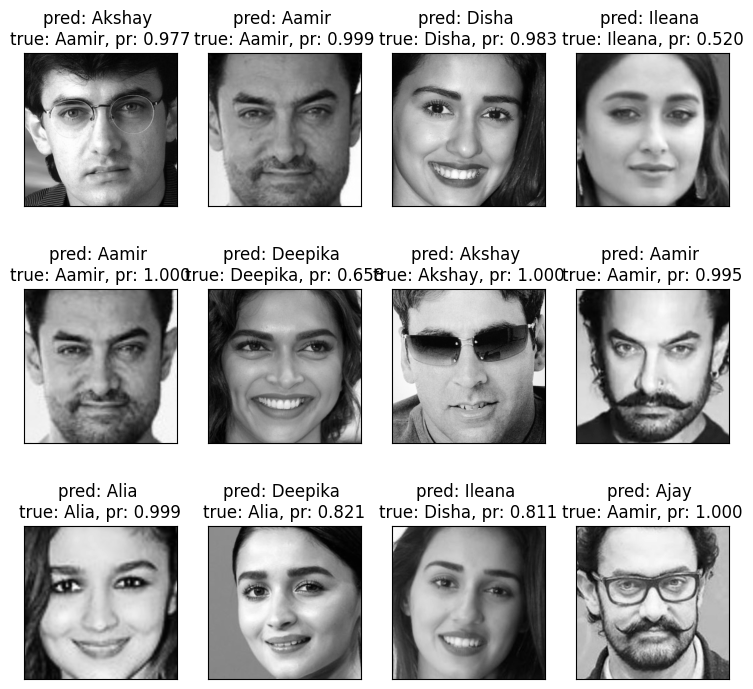

In [ ]:
y_pred = []
y_prob = []

# Iterate through each test sample in LDA-transformed test data
for test_face in X_test_lda:  # Ensure this matches your LDA variable
    prob = clf.predict_proba([test_face])[0]  # clf should be defined and trained

    # Find the class with the highest probability
    class_id = np.argmax(prob)

    # Append predictions and probabilities
    y_pred.append(class_id)
    y_prob.append(np.max(prob))

# Convert predictions to a NumPy array
y_pred = np.array(y_pred)

# Initialize variables for visualization and accuracy calculation
prediction_titles = []
true_positive = 0

# Generate prediction titles and calculate accuracy
for i in range(y_pred.shape[0]):
    true_name = class_names[y_test[i]]
    pred_name = class_names[y_pred[i]]
    result = f"pred: {pred_name} \ntrue: {true_name}, pr: {y_prob[i]:.3f}"
    prediction_titles.append(result)

    # Increment true positives if prediction matches ground truth
    if true_name == pred_name:
        true_positive += 1

# Calculate and display accuracy
accuracy = true_positive * 100 / y_pred.shape[0]
print(f"Accuracy: {accuracy:.2f}%")

# Plot the results
plot_gallery(X_test, prediction_titles, h, w)
plt.show()
